In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

X_data = np.load('X_data.npy', allow_pickle=True)
y_data = np.load('y_data.npy', allow_pickle=True)

print(X_data.shape)
print(y_data.shape)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

multi_output_xgb = MultiOutputRegressor(xgb_model)


(2219, 9890)
(2219, 2)
(1997, 9890)
(222, 9890)
(1997, 2)
(222, 2)


In [2]:
multi_output_xgb.fit(X_train, y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))

In [3]:
y_pred = multi_output_xgb.predict(X_test)

Mean Squared Error: 2818829007201.8403
R2 Score: 0.5091540685376145


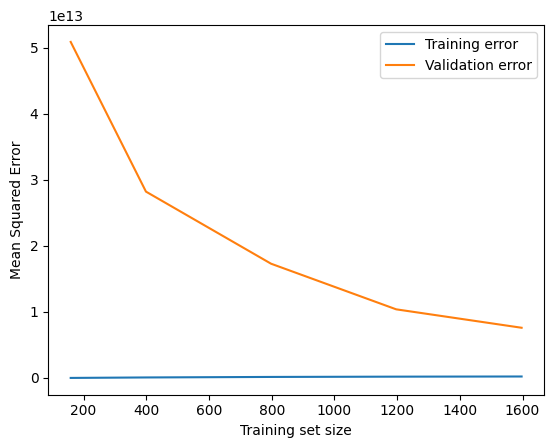

In [4]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

train_sizes, train_scores, test_scores = learning_curve(
    multi_output_xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=[0.1, 0.25, 0.5, 0.75, 1])

plt.plot(train_sizes, -train_scores.mean(axis=1), label='Training error')
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Validation error')
plt.xlabel('Training set size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [11]:
y_train_place = y_train[:, 0]
y_test_place = y_test[:,0]

# Encode the places as categorical labels
le = LabelEncoder()
y_train_place_encoded = le.fit_transform(y_train_place)
y_test_place_encoded = le.transform(y_test_place)
print(y_test_place_encoded)

# Create and train the XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

xgb_clf.fit(X_train, y_train_place_encoded)

# Make predictions
y_pred_place = xgb_clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test_place_encoded, y_pred_place)
print(f"Accuracy: {accuracy}")


[1 0 0 0 3 3 0 3 0 0 1 1 3 2 0 0 1 2 0 0 2 1 2 1 1 1 1 1 0 3 5 0 2 4 0 0 3
 1 1 3 1 0 0 1 2 1 0 0 0 0 0 0 0 1 1 2 6 1 3 1 6 4 1 1 1 0 3 1 2 1 1 0 3 1
 1 1 4 0 1 5 1 4 1 0 1 1 0 0 2 0 1 2 5 1 0 0 3 4 4 0 3 1 3 0 2 2 1 2 1 0 2
 1 1 0 3 0 7 1 0 1 0 1 2 3 0 0 0 1 3 2 2 2 0 2 2 1 3 4 0 2 1 0 1 2 1 0 1 1
 5 3 2 0 3 0 2 1 2 1 1 0 2 0 1 0 2 0 0 2 0 3 1 0 0 1 1 3 1 1 1 4 5 0 3 2 3
 0 0 1 0 2 1 3 2 1 0 1 1 0 3 0 2 2 2 1 0 0 1 1 1 2 0 1 3 2 0 0 0 6 0 1 2 2]
Accuracy: 0.19369369369369369

Classification Report:


ValueError: Number of classes, 8, does not match size of target_names, 10. Try specifying the labels parameter

In [12]:
print(y_pred_place)

[1 0 1 1 0 1 5 2 1 0 0 1 2 2 1 1 1 1 1 0 1 2 0 5 2 0 1 0 1 0 4 1 0 0 1 1 2
 2 1 4 0 3 0 2 1 0 2 0 2 0 6 1 1 0 0 0 2 0 1 1 1 4 0 0 2 0 0 0 1 2 0 1 2 0
 0 0 3 1 0 0 0 1 0 1 1 0 0 1 0 0 3 1 7 0 1 1 1 0 0 2 0 0 2 1 1 0 1 0 0 1 2
 0 2 0 2 1 4 1 0 4 0 0 1 3 1 1 0 1 1 1 2 1 0 1 3 0 0 1 1 1 0 0 0 1 0 1 0 1
 4 1 0 2 0 2 0 0 0 2 2 0 0 2 0 1 0 1 2 0 1 1 0 1 2 1 1 2 0 0 1 2 2 0 2 0 0
 1 1 0 1 0 0 0 1 0 1 0 3 0 3 0 1 1 0 0 0 1 0 2 4 0 3 2 1 0 0 1 0 1 0 0 0 0]
